## Week 5 -- Generalized integrate & fire models

nr of spikes: 7


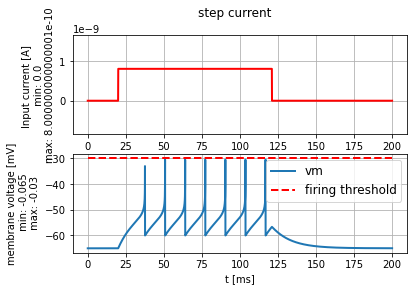

In [11]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [12]:
?exp_IF.simulate_exponential_IF_neuron

The parameters in the simulation can be changed in the call to `exp_IF.simulate_exponential_IF_neuron`.

The defaults are (in parentheses are legends, the actual parameter name is specified next

```python 
(MEMBRANE_TIME_SCALE_tau) tau = 12.0 * b2.ms
(MEMBRANE_RESISTANCE_R) R = 20.0 * b2.Mohm
v_rest = -65.0 * b2.mV
v_reset = -60.0 * b2.mV
(RHEOBASE_THRESHOLD_v_rh) v_rheobase = -55.0 * b2.mV
(SHARPNESS_delta_T) delta_T = 2.0 * b2.mV
(FIRING_THRESHOLD_v_spike) v_spike = -30. * b2.mV
```

for example:

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc468b7a8e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc4386a2b50>)

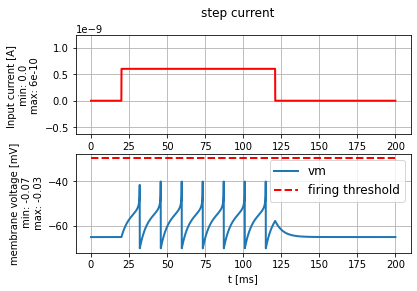

In [13]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.6 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_reset= -70 * b2.mV, tau= 5 * b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)


#### Question 1 

See [Exercise 3.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html#exercise-rehobase-threshold)

Modify the code example given above: Call simulate_exponential_IF_neuron() and set the function parameter v_spike=+10mV (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated?

#### Question 2

Compute the minimal amplitude I_rh of a constant input current such that the neuron will elicit a spike. If you are not sure what and how to compute I_rh, have a look at Figure 5.1 and the textbox “Rheobase threshold and interpretation of parameters” in the book.

NOTE: there is an error in the book: the condition is given by $\frac{du}{dt} = 0$ (and *not* $\frac{df}{du} = 0$) for $u = \vartheta_{rh}$. The condition suggested in the book is met by definition for all values of $I$....

#### Question 3

Now validate your result: Modify the code given above and inject a current of amplitude I_rh and 300 ms duration into the expIF neuron

#### Question 4 Strength-duration curve

See [Exercise 3.2](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html#exercise-strength-duration-curve) 

Have a look at the following code: for the values i = 0, 2 and 6 we did not provide the minimal amplitude, but the entries in min_amp[i] are set to 0. Complete the min_amp list.

- Set the index i to 0
- Enter an informed guess into the min_amp table
- Run the script
- Depending on the plot, increase or decrease the amplitude, repeat until you just get one spike.
- Do the same for i = 2 and i = 6
- At the end of the script, the strength-duration curve is plotted. Discuss it. You may want to add a log-log plot to - better see the asymptotic behaviour.

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

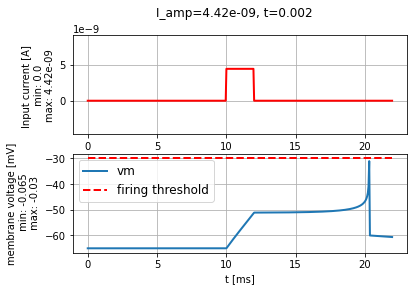

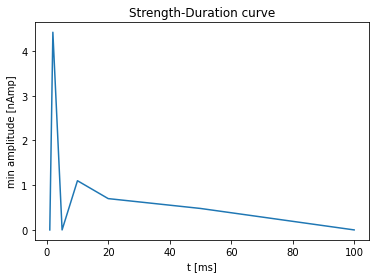

In [14]:
i=1  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [0., 4.42, 0., 1.10, .70, .48, 0.]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.figure()
plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")